# Telecom Churn Case Study

#### Problem Statement : 
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another.
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
So, the business goal is retaining high profitable customers

#### To Achieve the Business Goal to Retain Profitable Customers:
1. We'll be Analysing customer-level data of a leading telecom firm 
2. Building predictive models to identify customers at high risk of churn
3. Identifying the main indicators of churn.

#### Points to be taken care for this project
1. The project is based upon Indian and Southeast Asian market where prepaid service model is most common.To predict churn for prepaid mode is critical.
2. We'll be using Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

####  Detailed Approach Used
1. Analyszing the dataset to understand and get familiar with the data, extract insights and convert columns to appropriate formats.
2. Derive new features
3. Filter high-value customers 
4. Tag churners and remove attributes of the churn phase
5. Missing value treatment
6. Test Train Data Split
7. Reduce number of features using PCA 
8. Modelling. Train Variety of models,tune model hyperparameters
9. Evaluating models based on confusison matrix
10. Finally choosing an appropriate model
11. Predicting another model without using PCA to identify the most important predictor attibutes.
12. Recommend strategies to manage customer churn based on your observations.


In [1]:
# Importing all the required libraries and suppressing warnings

import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the telecom churn dataset
telecom_data = pd.read_csv(r"C:\Users\home\Downloads\telecom_churn_data.csv")
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


#### Extracting the Churn phase data(9th Month) from the given dataset

In [3]:
telecom_data_9=telecom_data[telecom_data.columns[telecom_data.columns.str.contains('_9')]]

In [4]:
telecom_data_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   last_date_of_month_9      98340 non-null  object 
 1   arpu_9                    99999 non-null  float64
 2   onnet_mou_9               92254 non-null  float64
 3   offnet_mou_9              92254 non-null  float64
 4   roam_ic_mou_9             92254 non-null  float64
 5   roam_og_mou_9             92254 non-null  float64
 6   loc_og_t2t_mou_9          92254 non-null  float64
 7   loc_og_t2m_mou_9          92254 non-null  float64
 8   loc_og_t2f_mou_9          92254 non-null  float64
 9   loc_og_t2c_mou_9          92254 non-null  float64
 10  loc_og_mou_9              92254 non-null  float64
 11  std_og_t2t_mou_9          92254 non-null  float64
 12  std_og_t2m_mou_9          92254 non-null  float64
 13  std_og_t2f_mou_9          92254 non-null  float64
 14  std_og

The above columns need to be dropped from the main dataset after creating the target variable churn as these won't be used for prediction

Also, to tag churners(i.e. to create target variable) , The attributes you need to use to tag churners are:
1. total_ic_mou_9
2. total_og_mou_9
3. vol_2g_mb_9
4. vol_3g_mb_9

So, as per the project, the customers whose total usuage for the telecom services (Call and data) is 0 , will be tagged as churn and other customers would be tagged as Non Churn.

Hence, Calculating here total_Usuage of telecom services by Customers in Churn Phase(September Month)

In [5]:
# Analysing the 9th Month Usuage columns 
telecom_data[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  99999 non-null  float64
 1   total_og_mou_9  99999 non-null  float64
 2   vol_2g_mb_9     99999 non-null  float64
 3   vol_3g_mb_9     99999 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


##### The above columns don't contain any null rows. So, can be directly added up to create total usuage in 9th Month.

In [6]:
telecom_data['total_usuage']=telecom_data['total_ic_mou_9']+telecom_data['total_og_mou_9']+telecom_data['vol_2g_mb_9']+telecom_data['vol_3g_mb_9']

In [7]:
# Create target variable - churn. If total_Usuage is 0, it will churn else won't churn.
telecom_data['churn']=telecom_data.total_usuage.apply(lambda x:1 if x==0 else 0)

In [8]:
# Analysing Total Usuage and Churn columns
telecom_data[['total_usuage','churn']]

,total_usuage,churn
0,0.00,1
1,260.15,0
2,651.10,0
3,667.92,0
4,309.90,0
...,...,...
99994,181.57,0
99995,215.25,0
99996,0.00,1
99997,4265.02,0


In [9]:
# Checking the churn percentage
churn_percentge=(telecom_data.churn.sum())/len(telecom_data)*100
churn_percentge

10.19110191101911

#### As Churn percentage is much lower than the non churn customers, we can see this is Class imbalace.
#### So, Class Imbalance would be handled later in this project.

In [10]:
# Dropping columns belonging to 9th month and total_usuage column as they won't be used for prediction
telecom_data.drop(columns=telecom_data_9.columns,inplace=True)
telecom_data.drop('total_usuage',axis=1,inplace=True)

In [11]:
# Checking the dataset shape
telecom_data.shape

(99999, 173)

#### Filtering the High Value Customers as these are important for the telecom company and they would want to reduce the churn rate for these customers
High Value Customers - Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [12]:
# High Value Customers
# We would be needing Recharge value columns to calculate High Value Customers
telecom_data[telecom_data.columns[telecom_data.columns.str.contains('_rech')]].isnull().sum()/len(telecom_data)*100

total_rech_num_6             0.000000
total_rech_num_7             0.000000
total_rech_num_8             0.000000
total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
date_of_last_rech_6          1.607016
date_of_last_rech_7          1.767018
date_of_last_rech_8          3.622036
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3

As the data type is float, we can impute the null value columns used for calculating recharge cost with 0 

In [13]:
# Imputing av_rech_amt_data_6,av_rech_amt_data_7,total_rech_data_6,total_rech_data_7 with 0
a=['av_rech_amt_data_6','av_rech_amt_data_7','total_rech_data_6','total_rech_data_7']
telecom_data[a]=telecom_data[a].fillna(0)

In [14]:
# For high Value Customres finding - Calculate Total Recharge Amount for June and July 

total_data_rech_amt_6=telecom_data['total_rech_data_6']*telecom_data['av_rech_amt_data_6']

total_call_rech_amt_6=telecom_data['total_rech_amt_6']

total_rech_amt_june=total_call_rech_amt_6+total_data_rech_amt_6

total_data_rech_amt_7=telecom_data['total_rech_data_7']*telecom_data['av_rech_amt_data_7']

total_call_rech_amt_7=telecom_data['total_rech_amt_7']

total_rech_amt_july=total_call_rech_amt_7+total_data_rech_amt_7


In [15]:
# Average of june and july
telecom_data['Avg_rech_amt_6_7']=(total_rech_amt_june+total_rech_amt_july)/2

In [16]:
# Analysing the data
len(telecom_data['Avg_rech_amt_6_7'])

99999

In [17]:
# calculating 70th percentile
telecom_data.Avg_rech_amt_6_7.quantile(0.7)

478.0

In [18]:
## Creating dataset having high value Customers
hvc_df=telecom_data[telecom_data.Avg_rech_amt_6_7 >= telecom_data.Avg_rech_amt_6_7.quantile(0.70)]

In [19]:
hvc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 174 entries, mobile_number to Avg_rech_amt_6_7
dtypes: float64(137), int64(28), object(9)
memory usage: 40.1+ MB


In [20]:
hvc_df.shape

(30001, 174)

In [21]:
# Dropping columns having a single value. As these columns won't have much importance in Analysis.
b=hvc_df.columns[hvc_df.nunique()==1]
hvc_df=hvc_df.drop(columns=b)

#### Missing Value Treatment 

In [22]:
# Checking for the null values
m=pd.DataFrame({'column_name':hvc_df.columns,'missing_per': hvc_df.isnull().sum()*100/len(hvc_df)}).reset_index(drop=True)

In [23]:
hvc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 161 entries, mobile_number to Avg_rech_amt_6_7
dtypes: float64(128), int64(27), object(6)
memory usage: 37.1+ MB


In [24]:
#check to see for which columns percentage of missing values is greater than 40
m.loc[m['missing_per']>40,:]

,column_name,missing_per
106,date_of_last_rech_data_6,44.148528
107,date_of_last_rech_data_7,43.145228
108,date_of_last_rech_data_8,46.825106
111,total_rech_data_8,46.825106
112,max_rech_data_6,44.148528
113,max_rech_data_7,43.145228
114,max_rech_data_8,46.825106
115,count_rech_2g_6,44.148528
116,count_rech_2g_7,43.145228
117,count_rech_2g_8,46.825106


In [25]:
# Seeing if int datatype colums have null rows. If yes, we'll impute them with 0
hvc_df.loc[:, hvc_df.dtypes=='int64'].isnull().sum()

mobile_number         0
total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
last_day_rch_amt_6    0
last_day_rch_amt_7    0
last_day_rch_amt_8    0
monthly_2g_6          0
monthly_2g_7          0
monthly_2g_8          0
sachet_2g_6           0
sachet_2g_7           0
sachet_2g_8           0
monthly_3g_6          0
monthly_3g_7          0
monthly_3g_8          0
sachet_3g_6           0
sachet_3g_7           0
sachet_3g_8           0
aon                   0
churn                 0
dtype: int64

#### No columns with int data type have null rows.

In [26]:
# Also,dropping mobile number as not of any use in prediction
hvc_df.drop('mobile_number',axis=1,inplace=True)

In [27]:
# checking null rows for float datatype
hvc_dff_col=hvc_df.loc[:, hvc_df.dtypes=='float64'].columns

# Imputing null values with 0 
[hvc_df[col].fillna(0.0, inplace=True) for col in hvc_dff_col]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [28]:
# # Checking Float datatype colums have null rows. It should be 0 now.
hvc_df.loc[:, hvc_df.dtypes=='float64'].isnull().sum().value_counts()

0    128
dtype: int64

In [29]:
#check to see for which columns percentage of missing values is greater than 0
m=pd.DataFrame({'column_name':hvc_df.columns,'missing_per': hvc_df.isnull().sum()*100/len(hvc_df)}).reset_index(drop=True)
m.loc[m['missing_per']>0,:]

,column_name,missing_per
99,date_of_last_rech_6,0.243325
100,date_of_last_rech_7,0.326656
101,date_of_last_rech_8,1.943269
105,date_of_last_rech_data_6,44.148528
106,date_of_last_rech_data_7,43.145228
107,date_of_last_rech_data_8,46.825106


In [30]:
# Date of last recharge for call and data can be imputed with min value pesent in the column
date_columns = hvc_df.select_dtypes(include='object').columns

In [31]:
for col in date_columns:
    x = hvc_df.loc[~hvc_df[col].isna(),col].min()
    hvc_df.loc[hvc_df[col].isna(),col] = x

In [32]:
for col in date_columns:
    hvc_df[col] = pd.to_datetime(hvc_df[col],errors='coerce')

In [33]:
# for calculating week of the month from date columns
for col in date_columns:
    hvc_df[col] = hvc_df[col].apply(lambda d: (d.day-1) // 7 + 1)

In [34]:
# Renaming date columns to week
hvc_df.rename(columns={'date_of_last_rech_6': 'week_of_last_rech_6', 'date_of_last_rech_7': 'week_of_last_rech_7',
                      'date_of_last_rech_8': 'week_of_last_rech_8','date_of_last_rech_data_6':'week_of_last_rech_data_6',
                      'date_of_last_rech_data_7':'week_of_last_rech_data_7',
                       'date_of_last_rech_data_8':'week_of_last_rech_data_8'},inplace=True)

In [35]:
# Check for any null values in the dataset
np.any(np.isnan(hvc_df))

False

In [36]:
# Check for any infinity values in the dataset
np.any(np.isinf(hvc_df))

False

#### So, we have cleaned the dataset and no missing values are present in the dataset now.

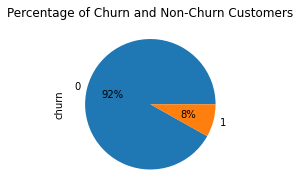

In [37]:
# Analysis of Churn percentage. Creating a pie Chart
fig = plt.figure(figsize=[4,3])
(hvc_df['churn'].value_counts()).plot(kind='pie', autopct='%1.0f%%')
plt.title('Percentage of Churn and Non-Churn Customers')
plt.show()

#### This shows Class Imbalance as Churn customer percentage is just 8% of the total customer data. To handle Class Imbalance we'll use Class_weight during modelling.
#### SMOTE technique can also be used for class imbalance. But for large dimensional datasets it's preferabe no to use.

In [38]:
# Correlation matrix 
plt.figure(figsize = (20,10))  
a=hvc_df.corr().abs()
a.unstack().sort_values(ascending=False)

Avg_rech_amt_6_7     Avg_rech_amt_6_7       1.000000
total_rech_data_6    total_rech_data_6      1.000000
week_of_last_rech_8  week_of_last_rech_8    1.000000
last_day_rch_amt_6   last_day_rch_amt_6     1.000000
last_day_rch_amt_7   last_day_rch_amt_7     1.000000
                                              ...   
isd_og_mou_6         arpu_2g_8              0.000006
og_others_7          loc_ic_t2m_mou_8       0.000003
loc_ic_t2m_mou_8     og_others_7            0.000003
std_ic_t2t_mou_8     og_others_8            0.000001
og_others_8          std_ic_t2t_mou_8       0.000001
Length: 25600, dtype: float64

<Figure size 1440x720 with 0 Axes>

### Data Visualization to analyize the pattern

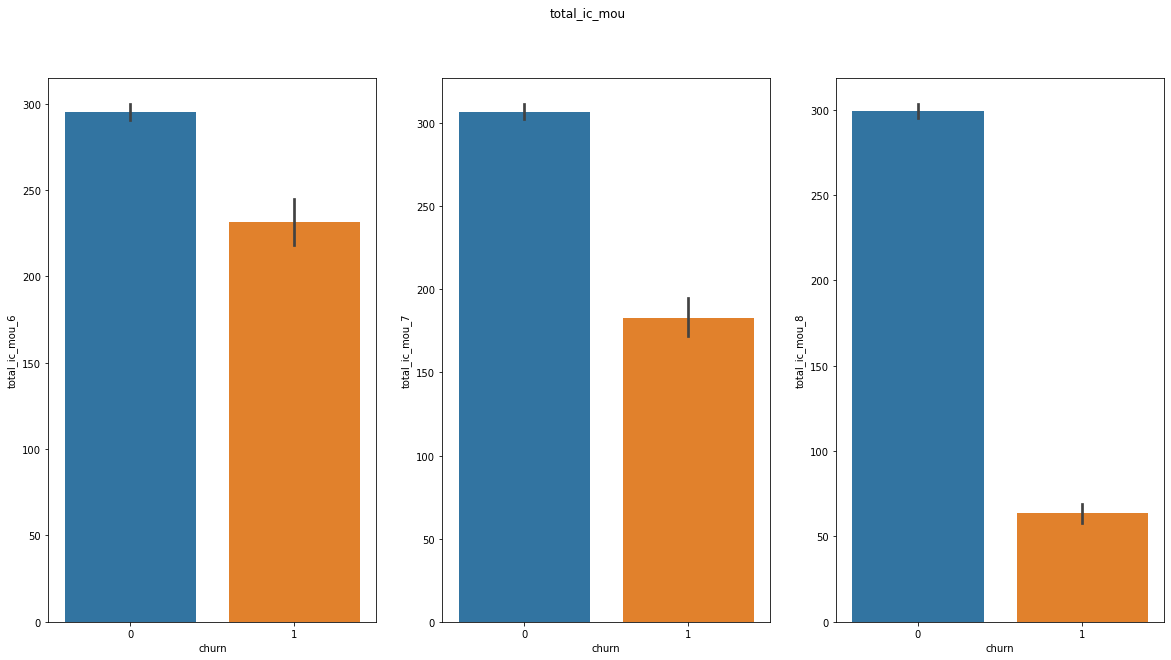

In [39]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.barplot(x='churn', y='total_ic_mou_6', data=hvc_df)
plt.subplot(1,3,2)
sns.barplot(x='churn', y='total_ic_mou_7', data=hvc_df)
plt.subplot(1,3,3)
sns.barplot(x='churn', y='total_ic_mou_8', data=hvc_df)
plt.suptitle('total_ic_mou')
plt.show()

#### The above graph shows that for the customers who are churned, the total usuage has gone down in subsequent month showing these will churn


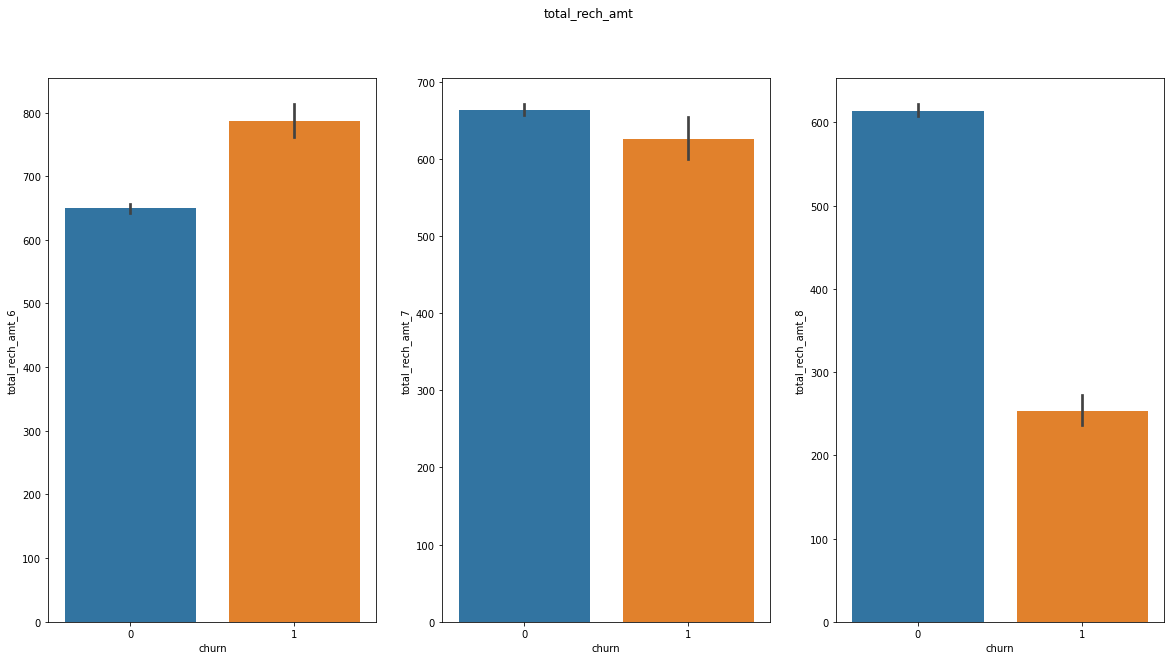

In [40]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.barplot(x='churn', y='total_rech_amt_6', data=hvc_df)
plt.subplot(1,3,2)
sns.barplot(x='churn', y='total_rech_amt_7', data=hvc_df)
plt.subplot(1,3,3)
sns.barplot(x='churn', y='total_rech_amt_8', data=hvc_df)
plt.suptitle('total_rech_amt')
plt.show()

#### The above graph shows that for the customers who are churned, the total recharge amount has gone down in subsequent months showing these will churn


## Modelling 

In [41]:
# Priniting top rows of dataset
hvc_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,Avg_rech_amt_6_7
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1,559.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1,1185.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0.0,1.0,1.0,315,21.03,910.65,122.16,0.00,0,696.0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0.0,0.0,0.0,720,0.00,0.00,0.00,0.00,0,640.0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,0.0,1.0,1.0,604,40.45,51.86,0.00,0.00,0,583.0


In [42]:
# Splitting predictor and target variables
y = hvc_df.pop('churn') #tv
X = hvc_df #pv

In [43]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [44]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(21000, 159) (21000,) (9001, 159) (9001,)


In [45]:
# Storing the name of predictor columns of X_train for future 
X_train_columns=X_train.columns

In [46]:
# Scaling the train dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.04741513,  0.16028637, -0.96889117, ...,  1.35421828,
        -0.15156914,  0.22685885],
       [-0.21366042, -0.09097989, -0.18065956, ..., -0.38075646,
        -0.15156914, -0.40400149],
       [-0.4313653 , -0.52725442, -0.43775977, ..., -0.38075646,
        -0.15156914, -0.36665745],
       ...,
       [ 1.10243551,  0.99217844, -0.04765787, ..., -0.38075646,
        -0.15156914,  0.18516405],
       [-0.35740833, -0.18291313,  0.4321179 , ..., -0.38075646,
        -0.15156914, -0.46418701],
       [ 1.97573273,  1.15712811,  0.74458101, ..., -0.38075646,
        -0.15156914,  0.19749121]])

In [47]:
# Scaling test dataset
X_test = scaler.transform(X_test)

In [48]:
X_train.shape

(21000, 159)

### Reducing number of variables using PCA

In [49]:
pca = PCA(random_state=42)

In [50]:
pca.fit(X_train)

PCA(random_state=42)

In [51]:
pca.components_

array([[-5.49286968e-02, -5.51160847e-02, -4.48831416e-02, ...,
         1.08511594e-01,  2.67879735e-02,  1.02402887e-01],
       [ 1.58037862e-01,  1.67401450e-01,  1.68672663e-01, ...,
         7.97582458e-02,  2.64754886e-02,  9.80276630e-02],
       [ 9.05619892e-02,  1.11242379e-01,  9.83706239e-02, ...,
         2.94704421e-02,  9.80943946e-03,  1.12129799e-01],
       ...,
       [ 0.00000000e+00,  5.32767951e-17, -5.65045290e-17, ...,
         5.25988975e-17,  2.70339122e-17,  2.34322708e-18],
       [-0.00000000e+00,  4.21707656e-16, -2.06422725e-16, ...,
        -1.31414623e-17,  3.94846732e-17,  1.94794427e-17],
       [ 0.00000000e+00,  1.20814891e-16,  5.30987901e-17, ...,
        -5.49031812e-17,  2.70064100e-18, -1.03373506e-17]])

In [52]:
pca.explained_variance_ratio_

array([1.14094196e-01, 8.90310397e-02, 6.28024183e-02, 5.37377642e-02,
       3.67585210e-02, 3.22642598e-02, 2.70726885e-02, 2.56034316e-02,
       2.31882382e-02, 2.14941840e-02, 2.04705027e-02, 1.97085913e-02,
       1.80052193e-02, 1.76712369e-02, 1.70239680e-02, 1.65842813e-02,
       1.53824761e-02, 1.42611573e-02, 1.37990692e-02, 1.33798648e-02,
       1.24160280e-02, 1.13819811e-02, 1.12399993e-02, 1.05087534e-02,
       1.01478122e-02, 9.78749414e-03, 9.13143491e-03, 8.90563604e-03,
       8.62288506e-03, 7.88377994e-03, 7.57943966e-03, 7.21990708e-03,
       7.13673610e-03, 7.01947319e-03, 6.64151644e-03, 6.41039726e-03,
       6.20744860e-03, 5.98563546e-03, 5.92811460e-03, 5.82003976e-03,
       5.65437461e-03, 5.51037001e-03, 5.36409657e-03, 5.28186772e-03,
       5.11221582e-03, 5.01509627e-03, 4.95183080e-03, 4.53109743e-03,
       4.39057443e-03, 4.34024019e-03, 4.31927989e-03, 4.11265488e-03,
       4.03268992e-03, 3.99784021e-03, 3.89410674e-03, 3.84556428e-03,
      

In [53]:
# Cummulative Vaiance
var_cumsum = np.cumsum(pca.explained_variance_ratio_)
var_cumsum

array([0.1140942 , 0.20312524, 0.26592765, 0.31966542, 0.35642394,
       0.3886882 , 0.41576089, 0.44136432, 0.46455256, 0.48604674,
       0.50651724, 0.52622583, 0.54423105, 0.56190229, 0.57892626,
       0.59551054, 0.61089302, 0.62515417, 0.63895324, 0.65233311,
       0.66474914, 0.67613112, 0.68737112, 0.69787987, 0.70802768,
       0.71781518, 0.72694661, 0.73585225, 0.74447513, 0.75235891,
       0.75993835, 0.76715826, 0.77429499, 0.78131447, 0.78795598,
       0.79436638, 0.80057383, 0.80655947, 0.81248758, 0.81830762,
       0.82396199, 0.82947236, 0.83483646, 0.84011833, 0.84523054,
       0.85024564, 0.85519747, 0.85972857, 0.86411914, 0.86845938,
       0.87277866, 0.87689132, 0.88092401, 0.88492185, 0.88881596,
       0.89266152, 0.89634679, 0.89989463, 0.90330447, 0.90663096,
       0.90988501, 0.91294837, 0.91585298, 0.91871444, 0.92153418,
       0.9241846 , 0.92680124, 0.92937908, 0.93193721, 0.93446106,
       0.93683375, 0.93919803, 0.94151469, 0.94376343, 0.94599

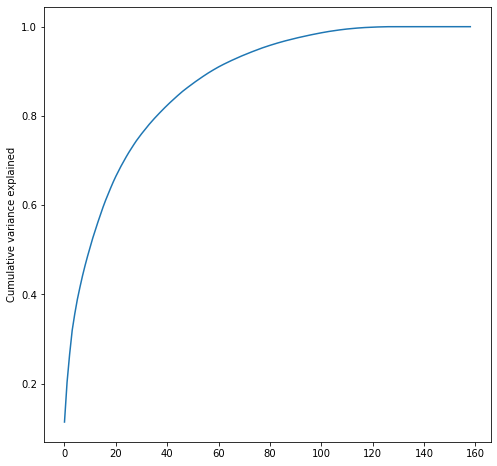

In [54]:
fig = plt.figure(figsize=[8,8])
plt.plot(var_cumsum)
plt.ylabel("Cumulative variance explained")
plt.show()

In [55]:
# PCA with 80 components
pca_final = IncrementalPCA(n_components=80)

In [56]:
X_train_pca = pca_final.fit_transform(X_train)

In [57]:
X_train_pca.shape

(21000, 80)

In [58]:
corr = np.corrcoef(X_train_pca.transpose())

In [59]:
corr.shape

(80, 80)

In [60]:
# Transformation on test dataset
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 80)

## Logistic Regression Model with PCA

In [61]:
learner_pca = LogisticRegression(class_weight="balanced")

In [62]:
#fitting the model
model_pca = learner_pca.fit(X_train_pca, y_train)

In [63]:
pred_probs_train = model_pca.predict_proba(X_train_pca)

In [64]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':pred_probs_train[:, 1].tolist()})

In [65]:
threshold = 0.5

In [66]:
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > threshold else 0)

In [67]:
y_train_pred_final.head(20)

,Churn,Churn_Prob,Predicted
0,1,0.864241,1
1,0,0.625369,1
2,0,0.053427,0
3,0,0.478402,0
4,0,0.112306,0
5,0,0.740002,1
6,0,0.520893,1
7,0,0.136456,0
8,0,0.120437,0
9,0,0.790828,1


In [68]:
# Confusion matrix for train dataset
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.8482758620689655
Accuracy   : 0.8308095238095238


#### High Sensitivity means there are few false negatives thus fewer cases of churn would be missed. Hence,sensitivity is required as much as possible. Hence, threshold=0.3 looks ok.

In [69]:
# Test set prediction
pred_probs_test = model_pca.predict_proba(X_test_pca)

In [70]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':pred_probs_test[:, 1].tolist()})

In [71]:
y_test_pred_final['Predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > threshold else 0)

In [72]:
y_test_pred_final.shape

(9001, 3)

In [73]:
# Confusion matrix for test dataset
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.8145506419400856
Accuracy   : 0.8221308743472947


## Decision Tree Model with PCA variables

In [74]:
tree = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf = 5, class_weight="balanced")
tree.fit(X_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [75]:
y_train_pred = tree.predict(X_train_pca)

In [76]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Predicted':y_train_pred})

In [77]:
# Confusion matrix for train dataset
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.8040229885057472
Accuracy   : 0.7774761904761904


## Hyper Parameter Tuning

In [78]:
# Tuning Hyperparameter
dt = DecisionTreeClassifier(random_state=42, class_weight="balanced")

In [79]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20, 50],
    'min_samples_leaf': [10, 20, 50, 100]
}

In [80]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [81]:
%%time
grid_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   30.3s finished


Wall time: 33.6 s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 50],
                         'min_samples_leaf': [10, 20, 50, 100]},
             scoring='recall', verbose=1)

In [82]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=100, random_state=42)

In [83]:
# train set prediction for deciion tree
y_train_pred = grid_search.best_estimator_.predict(X_train_pca)

In [84]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Predicted':y_train_pred})

In [85]:
# Confusion matrix for train
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.8695402298850575
Accuracy   : 0.7842857142857143


In [86]:
# Test set Predictions for decision tree
y_test_pred = grid_search.best_estimator_.predict(X_test_pca)

In [87]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Predicted':y_test_pred})

In [88]:
# Confusion matrix for test
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.7617689015691869
Accuracy   : 0.7548050216642596


## Random Forest

In [89]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced")

In [90]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 5, 10],
    'min_samples_leaf': [50, 100, 200],
    'max_features': [8, 10],
    'n_estimators': [50, 100, 200]
}

In [91]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [92]:
%%time
grid_search.fit(X_train_pca,y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  8.5min finished


Wall time: 8min 31s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'max_features': [8, 10],
                         'min_samples_leaf': [50, 100, 200],
                         'n_estimators': [50, 100, 200]},
             scoring='recall', verbose=1)

In [93]:
grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=8,
                       min_samples_leaf=50, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [94]:
# Train set prediction
y_train_pred = grid_search.best_estimator_.predict(X_train_pca)

In [95]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Predicted':y_train_pred})

In [96]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.7839080459770115
Accuracy   : 0.8172857142857143


In [97]:
# Test set prediction
y_test_pred = grid_search.best_estimator_.predict(X_test_pca)

In [98]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Predicted':y_test_pred})

In [99]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.7731811697574893
Accuracy   : 0.8100211087656927


##### Random Forest is giving a good model.

## Random Forest without PCA

In [100]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced")

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 5, 10],
    'min_samples_leaf': [50, 100, 200],
    'max_features': [8, 10],
    'n_estimators': [50, 100, 200]
}

In [101]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [102]:
%%time
grid_search.fit(X_train,y_train)




Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  4.8min finished


Wall time: 4min 48s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'max_features': [8, 10],
                         'min_samples_leaf': [50, 100, 200],
                         'n_estimators': [50, 100, 200]},
             scoring='recall', verbose=1)

In [103]:
rf_best=grid_search.best_estimator_

In [104]:
#### Train set prediction :: RF

y_train_pred = rf_best.predict(X_train)

y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Predicted':y_train_pred})

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.8126436781609195
Accuracy   : 0.8928095238095238


In [105]:
#### Test set prediction :: RF

y_test_pred = rf_best.predict(X_test)

y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Predicted':y_test_pred})

# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.Predicted)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Sensitivity and Accuracy Metrics
print("Sensitivity: " + str(TP / float(TP+FN)))
print("Accuracy   : " + str(float(TP + TN) / float(TP + TN + FP + FN)))

Sensitivity: 0.7888730385164051
Accuracy   : 0.8821242084212865


In [106]:
grid_search.best_estimator_.feature_importances_

array([1.15104063e-03, 2.65288654e-03, 4.49816411e-02, 1.30056011e-03,
       1.29630157e-03, 1.92609292e-02, 1.43867423e-03, 1.08153655e-03,
       1.40735647e-02, 3.85972175e-04, 1.18163243e-03, 2.40274115e-02,
       2.18755540e-04, 9.56528218e-04, 2.64999542e-02, 1.08285121e-03,
       1.05325834e-03, 4.11351940e-02, 2.29440752e-03, 2.65489920e-03,
       5.78355690e-02, 6.15971173e-04, 2.01255923e-03, 1.01136287e-02,
       1.59378514e-05, 9.75483448e-05, 5.21607536e-05, 7.23294625e-04,
       1.78973492e-03, 2.51406655e-02, 2.55261068e-03, 2.22338411e-03,
       1.28332400e-03, 8.43554977e-04, 1.64747408e-03, 2.96516069e-03,
       3.79475940e-07, 8.23975819e-06, 4.10090527e-05, 3.79270606e-03,
       4.86589280e-03, 6.86751401e-03, 8.65587246e-05, 1.28656640e-05,
       1.24449636e-04, 2.47155214e-04, 8.40155793e-04, 9.11976328e-04,
       1.07140251e-04, 0.00000000e+00, 0.00000000e+00, 1.62689047e-03,
       3.15266922e-03, 2.50326498e-02, 1.39167572e-03, 1.53203309e-03,
      

In [107]:
imp_hvc_df = pd.DataFrame({
    "Varname": X_train_columns,
    "Imp": grid_search.best_estimator_.feature_importances_
})

In [108]:
imp_hvc_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
65,loc_ic_mou_8,0.095269
80,total_ic_mou_8,0.067889
20,loc_og_t2m_mou_8,0.057836
2,arpu_8,0.044982
56,loc_ic_t2t_mou_8,0.044194
...,...,...
49,og_others_7,0.000000
136,night_pck_user_7,0.000000
50,og_others_8,0.000000
135,night_pck_user_6,0.000000


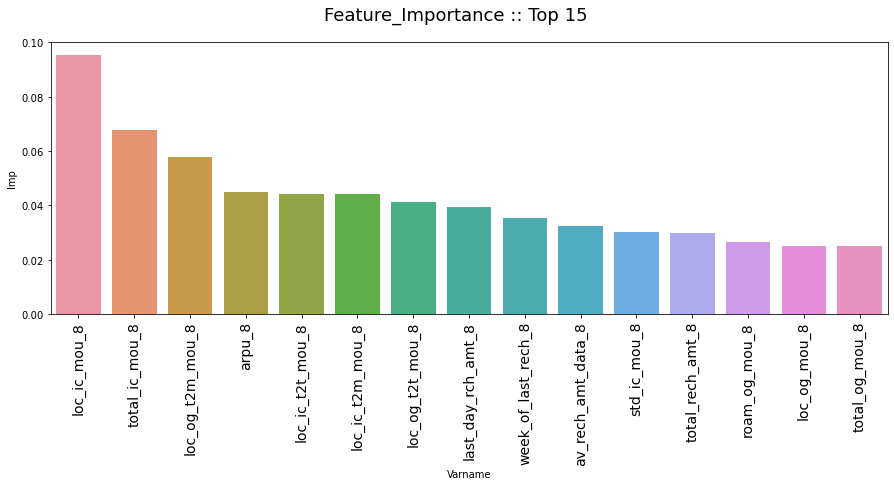

In [109]:
plt.figure(figsize=[15,5])
sns.barplot(x='Varname', y='Imp', data=imp_hvc_df.sort_values(by="Imp", ascending=False).head(15))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90, fontsize=14)
plt.suptitle('Feature_Importance :: Top 15', fontsize=18)
plt.show()

### Business Recommendations
1. The customers who are predicted to be churned can be faciliated with more offers on local and total incoming minutes of usuage
2. Run discount campaigns on certain weeks of month for data + incoming and outgoing calls
3. Within the same operator local incoming and outgoing minutes of usuage should be offered more deals
